# 0 - LIBRERÍAS Y ANÁLISIS DEL DATASET

In [1]:
# Importación de librerías generales
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb 

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from dtreeviz.trees import *
from IPython.core.display import display, HTML

# Lectura del dataset
iris = pd.read_csv('iris.csv')

In [2]:
# Comprobación del dataset (tabla del dataframe)
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


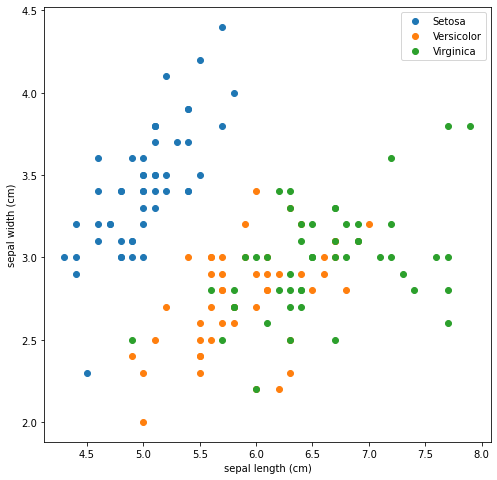

In [3]:
# Comprobación del dataset (gráfica de las distintas clases y un par de variables a elegir)
plt.rcParams['figure.figsize'] = [8, 8]

groups = iris.groupby('variety')
for name, group in groups:
    plt.scatter(group['sepal.length'], group['sepal.width'], label=name)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()
plt.show()

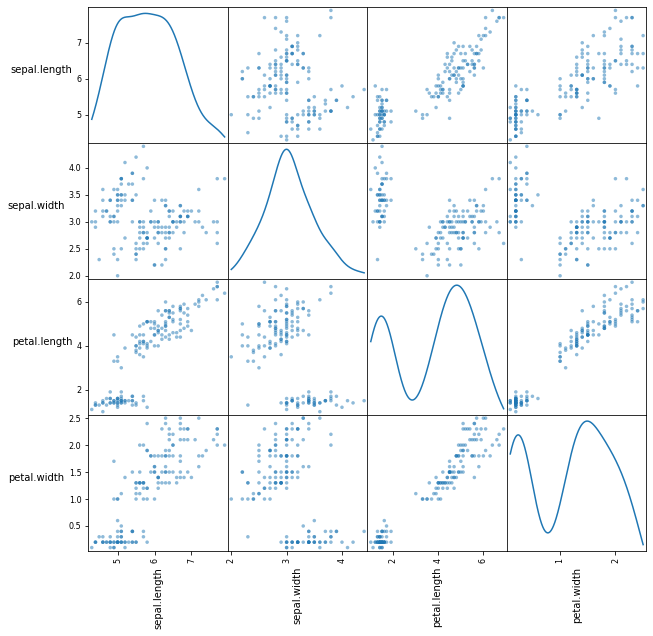

In [4]:
# Matriz de dispersión (scatter) y pares de variables
scatter_matrix = pd.plotting.scatter_matrix(
    iris,
    figsize  = [10, 10],
    marker   = ".",
    s        = 50,
    diagonal = "kde"
)

for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 10, rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 10, rotation = 0, ha='right')   

OBSERVACIÓN: Se aprecia que la agrupación de casos es homogénea en cuanto a la longitud y anchura del sépalo se refiere, centrándose en un pico central con dos colas proporcionadas a ambos lados. Este comportamiento es similar a las curvas gaussianas (datos balanceados).  
En cuanto a las dimensiones del pétalo (ancho y largo) se reflejan dos agrupaciones principales de datos (dos clústeres), que serían fácilmente reconocibles a través de métodos de aprendizaje no supervisado como K-means o Mean shift (aunque no es el objetivo de la actividad)

<AxesSubplot:>

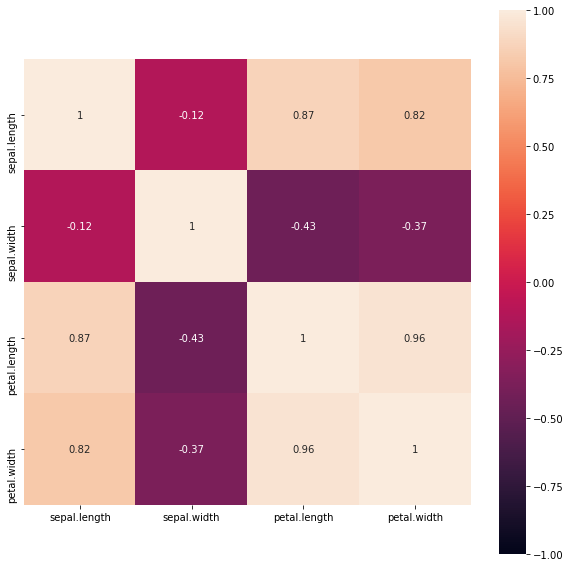

In [5]:
# Matriz de correlación
corrMatrix = iris.corr()

plt.rcParams['figure.figsize'] = 10, 10
data = np.round(corrMatrix, 2)
sb.heatmap(data, annot = True, vmin=-1, vmax=1, square=True) 

OBSERVACIÓN: Los pares de variables próximos a 1 muestran una alta correlación, lo que implica que, por ejemplo, la longitud y ancho del pétalo están muy relacionados (se deduce que generalmente el área de los pétalos crece en proporción, ya que cuando una dimensión es mayor también lo es la otra y viceversa).
Las correlaciones negativas, si bien no son próximas a -1, implican, por el contrario, una relación inversa.

# 1 - CLASIFICADORES Y MÉTRICAS

## Preprocesado de datos y funciones

In [6]:
# Se aislan las variables de entrada 'X' de la variable predictiva 'y'
X = iris.drop('variety', axis=1)     # Variables 'X', todas menos la etiqueta 'variedad'
y = iris['variety']                  # Variable 'y', la etiqueta 'variedad'

# Se convierten las variables a numpy para posteriormente poder aplicar reshape y adaptar su dimensión
X = np.nan_to_num(X)
y = np.nan_to_num(y)

# Para entrenar los modelos de clasificación es preciso codificar las strings de etiquetas a números
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)

# Finalmente, para evitar overfitting se dividen el conjunto de datos en conjunto de entrenamiento y de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
X_test = X_test.reshape(-X_test.shape[0],X_test.shape[1])    #Reshape de X_test para poder introducirlo

In [7]:
def metricas ():
    print("-----------------------------------------------------")
    print('Métricas de error:')
    print('MAE', metrics.mean_absolute_error(y_test, y_pred))  
    print('MSE', metrics.mean_squared_error(y_test, y_pred))  
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('Score:', clf.score(X_test, y_test))
    print("-----------------------------------------------------")
    print('Matriz de Confusión:')
    print(metrics.confusion_matrix(y_test, y_pred))
    print("-----------------------------------------------------")
    print('Report:')
    print(metrics.classification_report(y_test, y_pred))

## Modelos y resultados

OBSERVACIÓN: Para la actividad se utilizarán modelos predictivos de clasificación con unos hiperparámetros que han sido testados manualmente. Para datasets más complejos, o una vez que el modelo ha sido seleccionado, es preciso hacer búsquedas de hiperparámetro para mejorar el rendimiento del modelo (grid search o random search, por ejemplo).  
Se ha escogido un número limitado de clasificadores donde el criterio de clasificación es diverso, pero podrían emplearse otros como las SVM rbf, simples árboles de decisión o métodos gaussianos como GPC.

In [8]:
print("RANDOM FOREST")
clf = RandomForestClassifier(max_depth=20, n_estimators = 900, criterion = 'gini', random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

metricas()

RANDOM FOREST
-----------------------------------------------------
Métricas de error:
MAE 0.05333333333333334
MSE 0.05333333333333334
RMSE: 0.23094010767585033
Score: 0.9466666666666667
-----------------------------------------------------
Matriz de Confusión:
[[21  0  0]
 [ 0 29  1]
 [ 0  3 21]]
-----------------------------------------------------
Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.91      0.97      0.94        30
           2       0.95      0.88      0.91        24

    accuracy                           0.95        75
   macro avg       0.95      0.95      0.95        75
weighted avg       0.95      0.95      0.95        75



In [9]:
print("SVM POLYNOMIAL KERNEL")
clf = svm.SVC(kernel="poly", gamma='auto', C=20)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

metricas()

SVM POLYNOMIAL KERNEL
-----------------------------------------------------
Métricas de error:
MAE 0.02666666666666667
MSE 0.02666666666666667
RMSE: 0.16329931618554522
Score: 0.9733333333333334
-----------------------------------------------------
Matriz de Confusión:
[[21  0  0]
 [ 0 29  1]
 [ 0  1 23]]
-----------------------------------------------------
Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.97      0.97      0.97        30
           2       0.96      0.96      0.96        24

    accuracy                           0.97        75
   macro avg       0.98      0.98      0.98        75
weighted avg       0.97      0.97      0.97        75



In [10]:
print("SVM LINEAR KERNEL")
clf = svm.SVC(kernel="linear", gamma='auto', C=20)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

metricas()

SVM LINEAR KERNEL
-----------------------------------------------------
Métricas de error:
MAE 0.09333333333333334
MSE 0.09333333333333334
RMSE: 0.30550504633038933
Score: 0.9066666666666666
-----------------------------------------------------
Matriz de Confusión:
[[21  0  0]
 [ 0 29  1]
 [ 0  6 18]]
-----------------------------------------------------
Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.83      0.97      0.89        30
           2       0.95      0.75      0.84        24

    accuracy                           0.91        75
   macro avg       0.93      0.91      0.91        75
weighted avg       0.91      0.91      0.90        75



In [11]:
print("K NEAREST NEIGHBORS")
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

metricas()

K NEAREST NEIGHBORS
-----------------------------------------------------
Métricas de error:
MAE 0.06666666666666667
MSE 0.06666666666666667
RMSE: 0.2581988897471611
Score: 0.9333333333333333
-----------------------------------------------------
Matriz de Confusión:
[[21  0  0]
 [ 0 29  1]
 [ 0  4 20]]
-----------------------------------------------------
Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.88      0.97      0.92        30
           2       0.95      0.83      0.89        24

    accuracy                           0.93        75
   macro avg       0.94      0.93      0.94        75
weighted avg       0.94      0.93      0.93        75



In [12]:
print("MULTI LAYER PERCEPTRON (2 capas ocultas)")
clf = MLPClassifier(random_state=1, max_iter=500)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

metricas()

MULTI LAYER PERCEPTRON (2 capas ocultas)
-----------------------------------------------------
Métricas de error:
MAE 0.02666666666666667
MSE 0.02666666666666667
RMSE: 0.16329931618554522
Score: 0.9733333333333334
-----------------------------------------------------
Matriz de Confusión:
[[21  0  0]
 [ 0 29  1]
 [ 0  1 23]]
-----------------------------------------------------
Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.97      0.97      0.97        30
           2       0.96      0.96      0.96        24

    accuracy                           0.97        75
   macro avg       0.98      0.98      0.98        75
weighted avg       0.97      0.97      0.97        75



C:\Users\Alejandro\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


OBSERVACIONES: Los modelos con un mayor accuracy y con métricas de error más favorables son las máquinas de vector de soporte polinómicas (SVM_poly) y las redes neuronales con dos capas ocultas (MLP). Éstas presentan accuracies del 0.97, con métricas de error muy bajas.  
  
Cómo puede apreciarse en su matriz de confusión, todos los modelos son capaces de clasificar correctamente las flores de variedad Setosa (categoría 0), presentando más complicacones en el resto de variedades al recaer en True Negatives o False Positives. Esta característica de los datos tiene mucho que ver con la matriz de dispersión, donde se identificaban dos clústeres de datos: Se evidencia que una de las clases conforma una agrupación exclusiva, mientras que las otras dos clases se entremezclan más y es más difícil discernir entre ellas.

# 2 - REGLAS DE INFERENCIA

Aunque no es obligatorio, se pueden extraer reglas de inferencia para comprender el criterio de decisión de determinados modelos (árboles, random forest, regresiones lineales, etc). Para este ejemplo se utilizará la librería dtreeviz, aunque otras a través de graphviz también son muy interesantes.

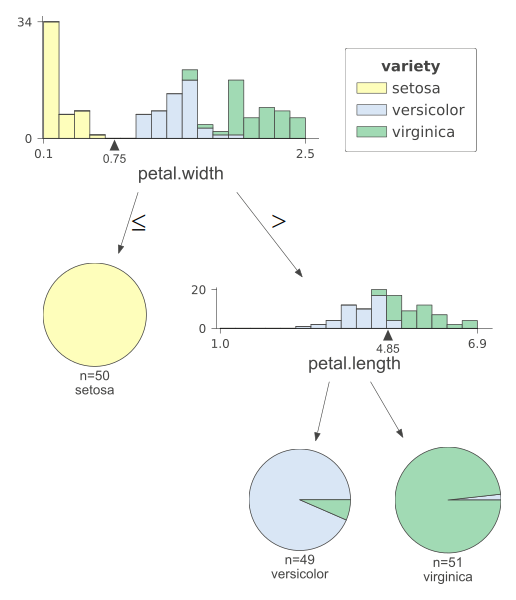

In [13]:
clf = RandomForestClassifier(max_depth=2, n_estimators = 900, criterion = 'gini', random_state=0)
clf.fit(X, y)

feature_names = list(iris.drop('variety', axis=1).columns)

viz = dtreeviz(clf.estimators_[0], 
               X,
               y,
               target_name='variety',
               feature_names = feature_names, 
               class_names=["setosa", "versicolor", "virginica"],
               scale=2,
               histtype= 'barstacked')  # barstackes is default
viz

OBSERVACIONES: A pesar de que el Modelo de Random Forest no es uno de los modelos con métricas más favorables, presenta la ventaja de poder extraer las reglas de inferencia de 1 o varios árboles que lo componen. Esta cualidad de Caja Blanca es ventajosa en conjuntos de datos como éste, donde al menos una de las variables parece claramente separable del resto (siempre que el ancho del pétalo es menor que 50cm se trata de flor de variedad Setosa).  
  
Incluso para el resto de variables, tras una segunda remificación el árbol es capaz de separar la tendencia con un ligero error, mostrando pues una gran capacidad de generalización (se evita el overfitting).

# 3 - SUPERFICIES DE DECISIÓN

In [14]:
plt.rcParams['figure.figsize'] = [5, 5]

def decision_boundary (X1, X2, y ,X_extend, y_extend, X, clf):
        
    x_min, x_max = X[:, 0].min()-X_extend, X[:, 0].max()+X_extend
    y_min, y_max = X[:, 1].min()-y_extend, X[:, 1].max()+y_extend
    h=0.01

    xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
    z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    z=z.reshape(xx.shape)
    
    fig, ax = plt.subplots()
    
    surface = ax.contourf(xx, yy, z, cmap='RdBu', alpha=0.8)
    points = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='black', cmap='RdBu')
    legend1 = ax.legend(*points.legend_elements(),
                loc="upper right", title="Classes to predict")
    plt.xlabel(X1.name)
    plt.ylabel(X2.name)

In [15]:
def db_rf (X1, X2, y ,X_extend, y_extend):       
    X = np.vstack((X1,X2)).T   
    clf = RandomForestClassifier(max_depth=20, random_state=0)
    clf.fit(X, y)    
    decision_boundary (X1, X2, y ,X_extend, y_extend, X, clf)
    
def db_svm_pol (X1, X2, y ,X_extend, y_extend):       
    X = np.vstack((X1,X2)).T   
    clf = svm.SVC(kernel="poly", gamma='auto', C=20)
    clf.fit(X, y)   
    decision_boundary (X1, X2, y ,X_extend, y_extend, X, clf)
    
def db_svm_lin (X1, X2, y ,X_extend, y_extend):       
    X = np.vstack((X1,X2)).T   
    clf = svm.SVC(kernel="linear", gamma='auto', C=20)
    clf.fit(X, y)   
    decision_boundary (X1, X2, y ,X_extend, y_extend, X, clf)
        
def db_kn (X1, X2, y ,X_extend, y_extend):       
    X = np.vstack((X1,X2)).T   
    clf = KNeighborsClassifier(n_neighbors=3)
    clf.fit(X, y)   
    decision_boundary (X1, X2, y ,X_extend, y_extend, X, clf)
            
def db_mlp (X1, X2, y ,X_extend, y_extend):       
    X = np.vstack((X1,X2)).T   
    clf = MLPClassifier(random_state=1, max_iter=500)
    clf.fit(X, y)   
    decision_boundary (X1, X2, y ,X_extend, y_extend, X, clf)

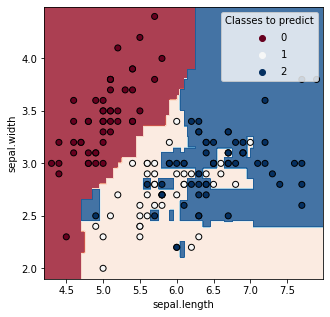

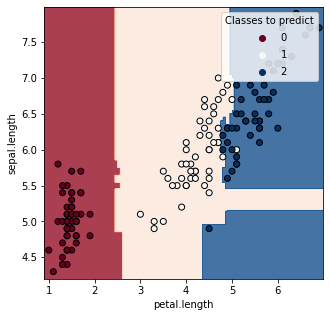

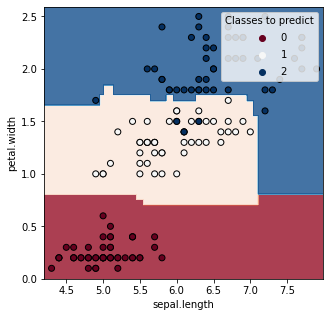

In [16]:
# RANDOM FOREST
db_rf(iris['sepal.length'], iris['sepal.width'], y, 0.1, 0.1)
db_rf(iris['petal.length'], iris['sepal.length'], y, 0.1, 0.1)
db_rf(iris['sepal.length'], iris['petal.width'], y, 0.1, 0.1)

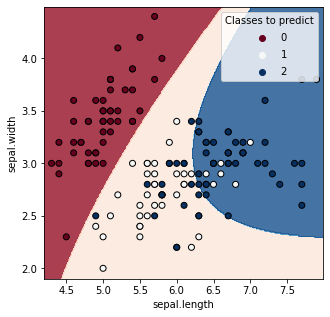

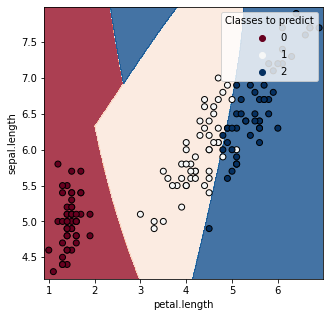

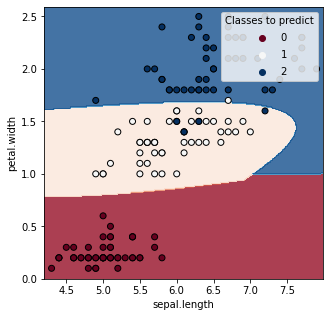

In [17]:
# SVM POLYNOMIAL KERNEL
db_svm_pol(iris['sepal.length'], iris['sepal.width'], y, 0.1, 0.1)
db_svm_pol(iris['petal.length'], iris['sepal.length'], y, 0.1, 0.1)
db_svm_pol(iris['sepal.length'], iris['petal.width'], y, 0.1, 0.1)

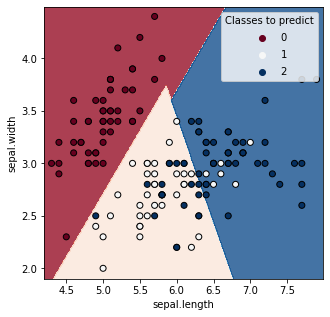

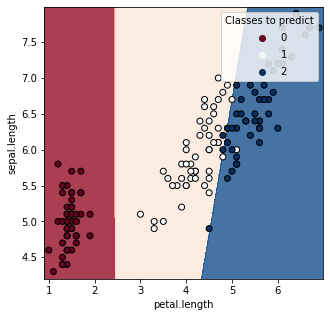

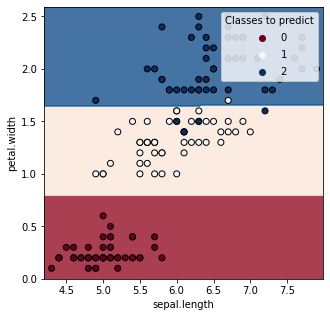

In [18]:
# SVM LINEAR KERNEL
db_svm_lin(iris['sepal.length'], iris['sepal.width'], y, 0.1, 0.1)
db_svm_lin(iris['petal.length'], iris['sepal.length'], y, 0.1, 0.1)
db_svm_lin(iris['sepal.length'], iris['petal.width'], y, 0.1, 0.1)

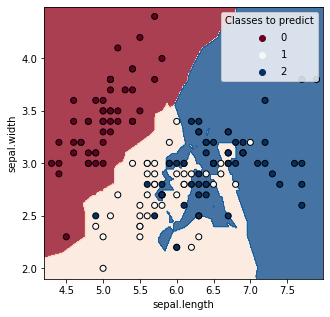

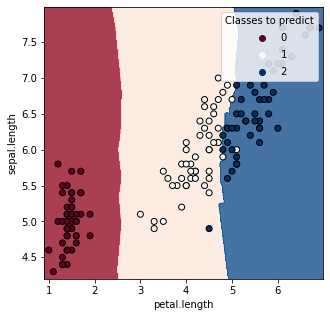

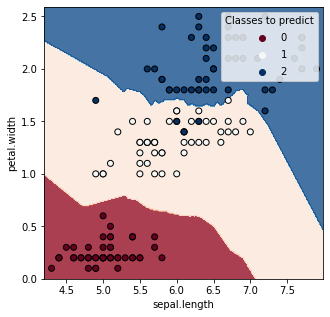

In [19]:
# K NEAREST NEIGHBORS
db_kn(iris['sepal.length'], iris['sepal.width'], y, 0.1, 0.1)
db_kn(iris['petal.length'], iris['sepal.length'], y, 0.1, 0.1)
db_kn(iris['sepal.length'], iris['petal.width'], y, 0.1, 0.1)

C:\Users\Alejandro\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Alejandro\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Alejandro\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


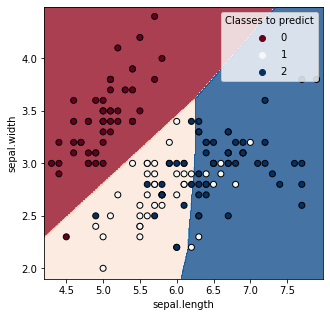

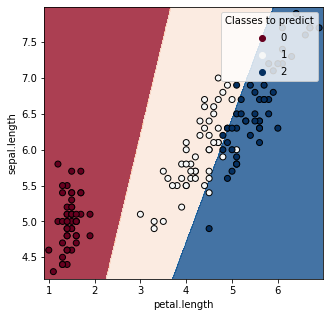

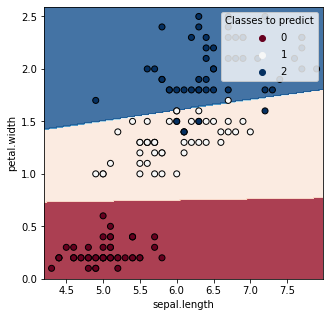

In [20]:
# MULTI LAYER PERCEPTRON
db_mlp(iris['sepal.length'], iris['sepal.width'], y, 0.1, 0.1)
db_mlp(iris['petal.length'], iris['sepal.length'], y, 0.1, 0.1)
db_mlp(iris['sepal.length'], iris['petal.width'], y, 0.1, 0.1)

OBSERVACIONES: Las superficies de decisión de los modelos escogidos sobre 3 pares de variables demuestran las diferencias de criterios de los diversos modelos.  
  
Si se comparan las superficies de los modelos con mayor accuracy (SVM_poly y MLP) se comprueba que pese a obtener los mismos resultados el criterio de decisión es distinto.  
  
Por ejemplo, para el par ancho y largo de pétalo, SVM_poly clasifica bien todos los casos de categoría 0, mientras que MLP falla en uno de los casos pudiendo generar inferencias incorrectas en futuros casos desconocidos.   
Por contra, para el par longitud de sépalo y longitud de pétalo, SVM_poly genera superficies de decisión en lugares aparentemente poco coherentes debido a las condiciones de su kernel.